In [1]:
import pandas as pd
import numpy as np
from numpy.random import choice, normal
from pandas import Series, DataFrame
import time
import matplotlib 

In [2]:
%matplotlib inline

In [3]:
matplotlib.rcParams["font.size"] = 16

In [4]:
# ignore this cell - it makes the emphasized text red and uses the full width of the screen
from IPython.core.display import HTML
HTML('<style>em { color: red; }</style> <style>.container {width:100% !important; }</style>')

<img src="coins.png">

## Which sequence of coins was generated *randomly*?  Which was *handpicked* with the goal of tricking you?

In [5]:
# Write your guess in this cell
2

2

----
### Random selection from a list

In [6]:
#choice([<option1>, <option2> <...>])
choice(["rock", "paper", "scissors"])

'rock'

----
### Make lots of choices 

In [7]:
choice(["rock", "paper", "scissors"], size=5)

array(['paper', 'scissors', 'paper', 'scissors', 'rock'], dtype='<U8')

In [8]:
type(choice(["rock", "paper", "scissors"], size=5))

numpy.ndarray

In [9]:
a = choice(["rock", "paper", "scissors"], size=5)
print(a)

['scissors' 'paper' 'paper' 'paper' 'rock']


In [10]:
a[2]

'paper'

----
### Random series

In [11]:
Series(choice(["rock", "paper", "scissors"], size=5))

0        rock
1    scissors
2    scissors
3       paper
4        rock
dtype: object

----
### Multidimensional random Series

In [12]:
#choice(["rock", "paper", "scissors"], size=(ROWS, COLUMNS))
#size=(ROWS, COLUMNS))
#        V ,   -->
a = choice(["rock", "paper", "scissors"], size=(5, 2))
a

array([['scissors', 'paper'],
       ['rock', 'rock'],
       ['scissors', 'paper'],
       ['scissors', 'rock'],
       ['rock', 'rock']], dtype='<U8')

In [13]:
a[2][1]

'paper'

In [14]:
#DataFrame(LIST of LISTS)
DataFrame(choice(["rock", "paper", "scissors"], size=(5, 2)))

,0,1
0,rock,scissors
1,paper,rock
2,rock,scissors
3,rock,paper
4,paper,scissors


----
### Exploring Bias - is this fair?

rock        7
paper       6
scissors    2
dtype: int64


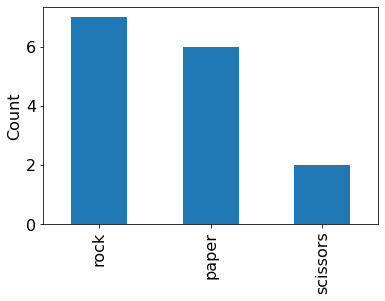

In [15]:
s = Series(choice(["rock", "paper", "scissors"], size=15))
vc = s.value_counts()
print(vc)

ax = vc.plot.bar()
ax.set_ylabel("Count")
None

----
### Sort by item

paper       7
rock        1
scissors    7
dtype: int64


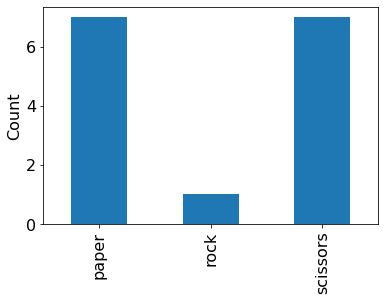

In [16]:
s = Series(choice(["rock", "paper", "scissors"], size=15))
vc = s.value_counts()
vc = vc.sort_index()
print(vc)

ax = vc.plot.bar()
ax.set_ylabel("Count")
None

----
### Sorted as "rock", "paper", "scissors"

rock        6
paper       3
scissors    6
dtype: int64


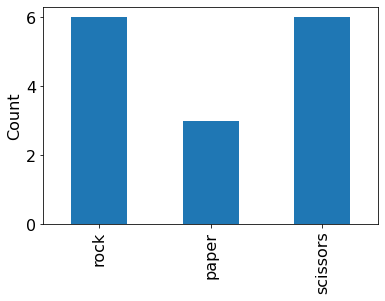

In [17]:
s = Series(choice(["rock", "paper", "scissors"], size=15))
vc = s.value_counts()
vc = vc[ ["rock", "paper", "scissors"] ]
print(vc)

ax = vc.plot.bar()
ax.set_ylabel("Count")
None

----
### Is this really fair? 

rock        1000091
paper        998937
scissors    1000972
dtype: int64


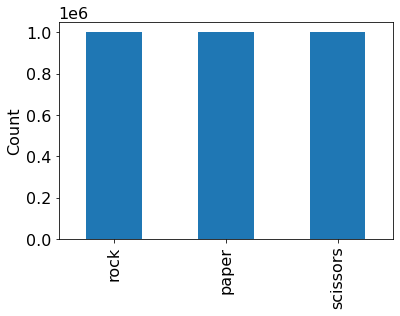

In [18]:
s = Series(choice(["rock", "paper", "scissors"], size=3000000))
vc = s.value_counts()
vc = vc[ ["rock", "paper", "scissors"] ]
print(vc)

ax = vc.plot.bar()
ax.set_ylabel("Count")
None

----
### Control the probability of selection

rock         30013
paper        60147
scissors    209840
dtype: int64


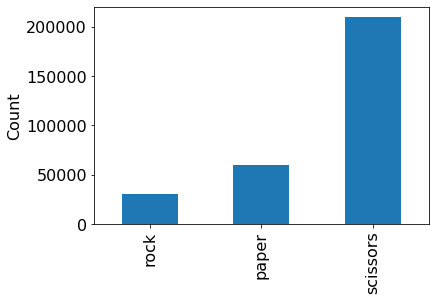

In [19]:
s = Series(choice(["rock", "paper", "scissors"], size=300000, p=[0.10, 0.20, 0.70]))
vc = s.value_counts()
vc = vc[ ["rock", "paper", "scissors"] ]
print(vc)

ax = vc.plot.bar()
ax.set_ylabel("Count")
None

----
### Random integer shortcut

In [20]:
Series(choice(6, size=5,))

0    0
1    5
2    5
3    3
4    0
dtype: int64

----
### Back to PowerPoint to talk about Bugs

----
### Change over time

0    2
1    5
2    1
3    7
4    5
dtype: int64


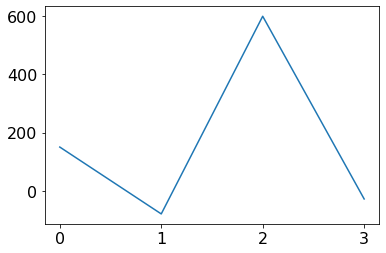

In [21]:
# Change over time
s = Series(choice(10,size=5))
percents = []
for i in range(1, len(s)):
    diff = 100 * (s[i] / s[i-1] -1)
    percents.append(diff)
print(s)
Series(percents).plot.line()
None

----
### Back to PowerPoint again - more about Bugs

----
### Seeding

In [22]:
np.random.seed(220)
choice(1000, size=3)

array([883, 732,  15])

In [23]:
choice(1000, size=3)

array([180, 120, 514])

In [24]:
np.random.seed(220)
choice(1000, size=6)

array([883, 732,  15, 180, 120, 514])

In [25]:
choice(1000, size=3)

array([112, 626,  27])

----
### Seeding with time

In [26]:
# requires import of time module
time.time()
now = int(time.time())
print(now)

np.random.seed(now)
choice(1000, size=3)
print("Seeding with:", now)

1639371636
Seeding with: 1639371636


----
### Significance - Does the data support drawing that conclusion?

----
### Is it weird that we have 60 heads, 40 tails? How often are we +- 10 of the expected

In [27]:
trials = 10
flips = 3
df = DataFrame(choice(["H","T"], size = (trials, flips)))
df

,0,1,2
0,T,T,H
1,T,H,H
2,T,T,H
3,T,H,T
4,H,T,H
5,H,H,T
6,T,T,T
7,H,H,T
8,H,H,H
9,H,H,T


In [28]:
trials = 10
flips = 3
df = DataFrame(choice([1,0], size = (trials, flips)))
df

,0,1,2
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,0
4,0,0,0
5,0,0,1
6,1,0,1
7,1,1,1
8,0,1,1
9,1,0,1


In [29]:
trials = 10
flips = 3
df = DataFrame(choice([1,0], size = (trials, flips)))
print(df)
df.sum(axis=1)

   0  1  2
0  1  0  0
1  0  0  0
2  0  0  0
3  0  1  1
4  1  0  1
5  1  0  0
6  0  1  0
7  0  1  0
8  0  1  0
9  0  1  0


0    1
1    0
2    0
3    2
4    2
5    1
6    1
7    1
8    1
9    1
dtype: int64

In [30]:
trials = 10000
flips = 100
df = DataFrame(choice([1,0], size = (trials, flips)))
print(df)
counts = df.sum(axis=1)
counts

      0   1   2   3   4   5   6   7   8   9   ...  90  91  92  93  94  95  96  \
0      0   0   1   0   0   0   0   1   0   1  ...   1   1   1   1   0   0   1   
1      0   1   1   0   1   0   0   1   0   1  ...   1   1   1   0   0   0   1   
2      1   0   1   0   1   1   0   1   0   1  ...   0   1   0   0   1   0   1   
3      1   0   0   1   1   0   0   1   0   0  ...   1   1   1   0   0   1   0   
4      0   0   0   1   1   0   1   0   0   1  ...   0   1   1   0   0   1   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
9995   1   0   0   0   0   1   0   1   1   1  ...   0   1   0   1   0   0   0   
9996   1   0   0   0   0   0   1   0   0   0  ...   0   0   1   0   0   1   0   
9997   0   0   0   1   0   0   1   1   0   1  ...   1   0   0   1   0   1   0   
9998   0   1   1   1   0   1   0   0   0   1  ...   1   1   0   1   0   0   0   
9999   0   0   0   0   0   0   0   1   0   1  ...   0   0   0   0   0   0   1   

      97  98  99  
0      0

0       44
1       48
2       52
3       48
4       47
        ..
9995    51
9996    47
9997    41
9998    48
9999    41
Length: 10000, dtype: int64

In [31]:
extremes = counts[(counts <= 40) | (counts >= 60)]
len(extremes) / trials * 100

5.8500000000000005

----
### Opening example with the 16 coins - How often do we get 11 or more heads?

In [32]:
flips = 16
trials = 10000
df = DataFrame(choice([1, 0], size = (trials, flips)))
counts = df.sum(axis=1)
result = counts[counts >= 11]
len(result) / trials * 100

10.870000000000001

----
### How often do we see 7 heads in a row out of 16 coins

In [33]:
seven_or_more = 0
trials = 10000
for i in range(trials):
    s = "".join(choice(["H","T"], size=16))
    if s.find("HHHHHHH") != -1:
        seven_or_more += 1
seven_or_more / trials * 445 

19.0015

### Self-study

<AxesSubplot:>

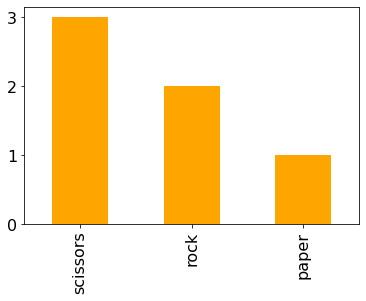

In [34]:
s = Series(["rock", "rock", "paper", "scissors", "scissors", "scissors"])
s.value_counts().plot.bar(color="orange")

<AxesSubplot:>

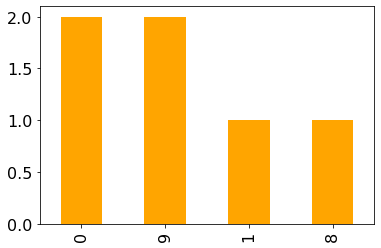

In [35]:
s = Series([0, 0, 1, 8, 9, 9])
s.value_counts().plot.bar(color="orange")

<AxesSubplot:>

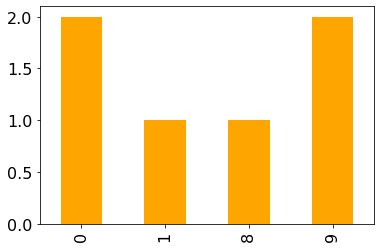

In [36]:
s.value_counts().sort_index().plot.bar(color="orange")

<AxesSubplot:ylabel='Frequency'>

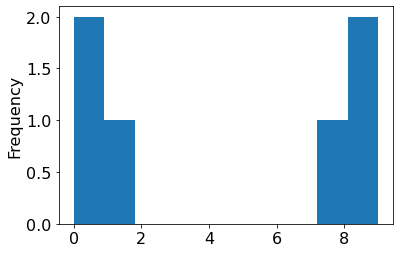

In [37]:
s.plot.hist()

<AxesSubplot:ylabel='Frequency'>

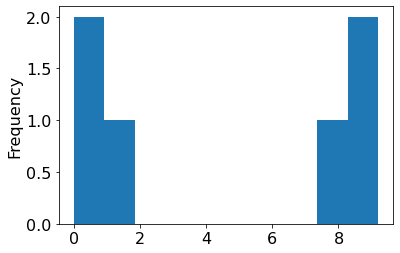

In [38]:
s = Series([0.1, 0, 1, 8, 9, 9.2])
s.plot.hist() # a histogram "bins" nearby numbers to create discrete bars
# first bar represents both 0 and 0.1
# last bar represents both 9 and 9.2

<AxesSubplot:ylabel='Frequency'>

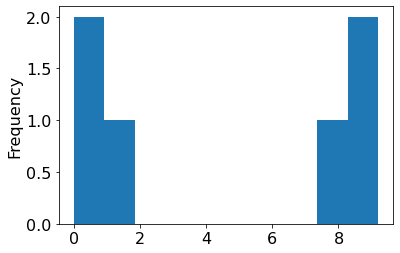

In [39]:
s.plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

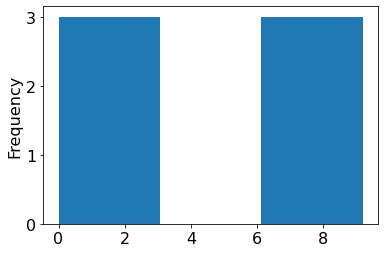

In [40]:
s.plot.hist(bins=3) # too few bins provides too little detail

<AxesSubplot:ylabel='Frequency'>

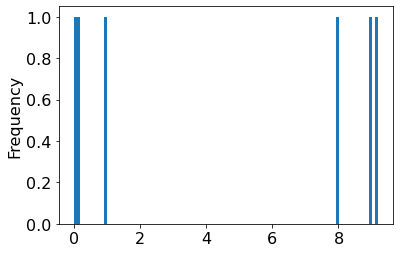

In [41]:
s.plot.hist(bins=100) #too many bins provides too much detail (equally bad)

<AxesSubplot:ylabel='Frequency'>

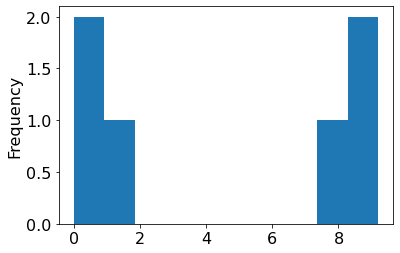

In [42]:
s.plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

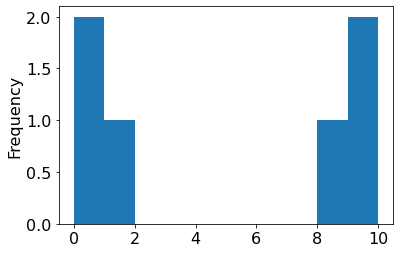

In [43]:
s.plot.hist(bins=[0,1,2,3,4,5,6,7,8,9,10])

<AxesSubplot:ylabel='Frequency'>

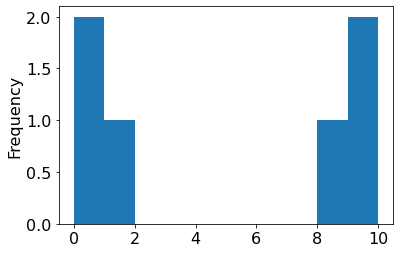

In [44]:
s.plot.hist(bins=range(11)) # same as above

<AxesSubplot:ylabel='Frequency'>

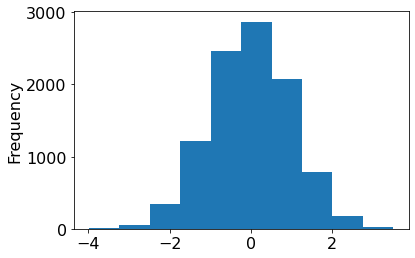

In [45]:
s = Series(normal(size=10000))

s.plot.hist()

<AxesSubplot:ylabel='Frequency'>

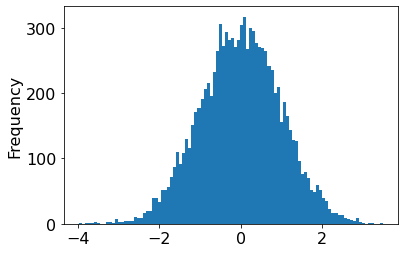

In [46]:
s.plot.hist(bins=100)